<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/Assignment4_Q1_Linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading a csv file using pandas library
data=pd.read_csv("/content/delivery_time (1).csv")
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [3]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data.columns

Index(['delivery_time', 'sorting_time'], dtype='object')

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

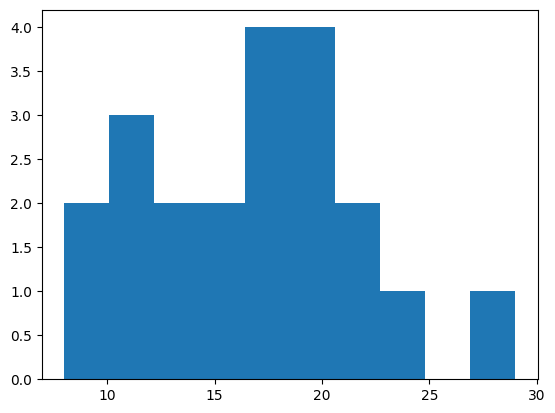

In [4]:
plt.hist(data.delivery_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa4cc5448b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa4cc544d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa4cc544610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa4cc557310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa4cc5575b0>],
 'means': []}

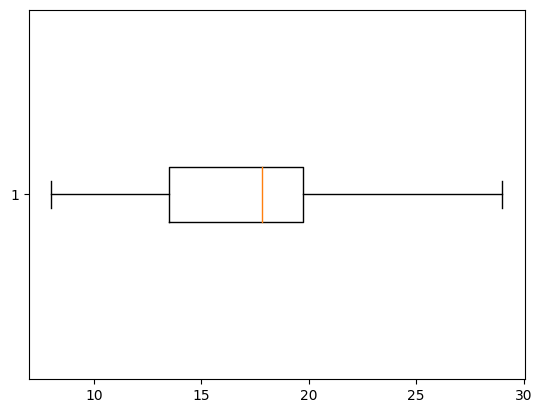

In [5]:
plt.boxplot(data.delivery_time,0,"rs",0)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

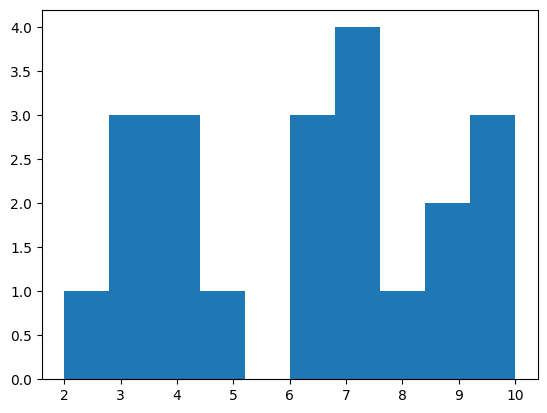

In [6]:
plt.hist(data.sorting_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa4cc46a340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa4cc46a880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa4cc46a0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa4cc46adc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa4cc3f80a0>],
 'means': []}

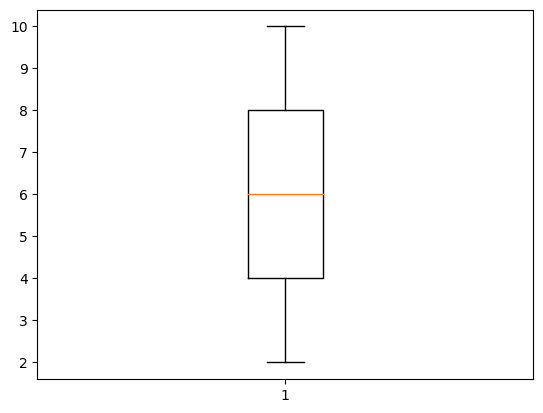

In [7]:
plt.boxplot(data.sorting_time)

Text(0, 0.5, 'delivery_time')

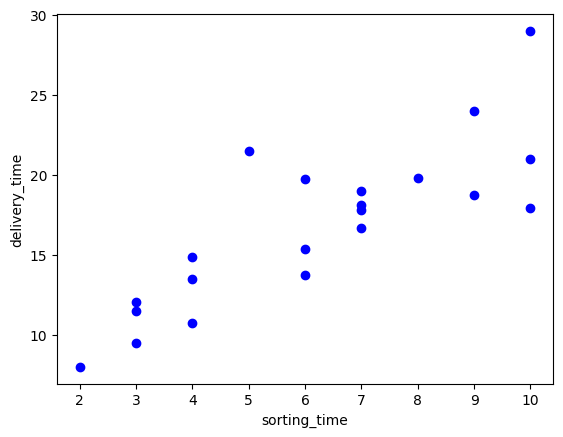

In [8]:
plt.plot(data.sorting_time,data.delivery_time,"bo");plt.xlabel("sorting_time");plt.ylabel("delivery_time")

In [9]:
data.sorting_time.corr(data.delivery_time) # # correlation value between X and Y
np.corrcoef(data.delivery_time,data.sorting_time)

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [10]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf
model=smf.ols("sorting_time~delivery_time",data=data).fit()

In [11]:
# For getting coefficients of the varibles used in equation
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [12]:
# P-values for the variables and R-squared value for prepared model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        05:19:48   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-3.130058,1.616712
delivery_time,0.278169,0.549318


In [14]:
pred = model.predict(data.iloc[:,0]) # Predicted values of AT using the model

Text(0, 0.5, 'delivery_time')

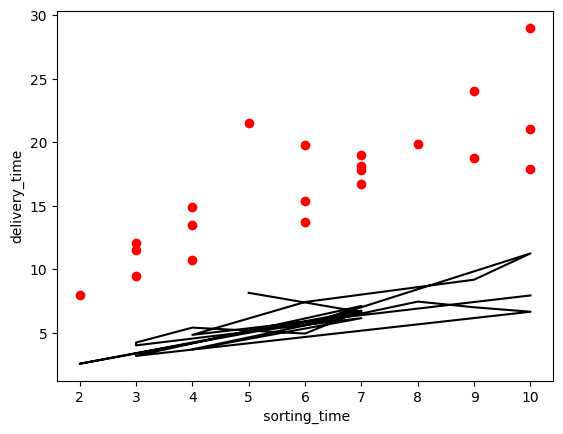

In [15]:
# Visualization of regresion line over the scatter plot of  sorting_time and delivery_time
# For visualization we need to import matplotlib.pyplot
import matplotlib.pylab as plt
plt.scatter(x=data['sorting_time'],y=data['delivery_time'],color='red');plt.plot(data['sorting_time'],pred,color='black');plt.xlabel(' sorting_time');plt.ylabel('delivery_time')

In [16]:
pred.corr(data.delivery_time) # 0.999

0.9999999999999994

In [17]:
# Transforming variables for accuracy
model2 = smf.ols('delivery_time~np.log(sorting_time)',data=data).fit()
model2.params
model2.summary()
print(model2.conf_int(0.01)) # 99% confidence level
pred2 = model2.predict(pd.DataFrame(data['sorting_time']))
pred2.corr(data.delivery_time)

                             0          1
Intercept            -5.862666   8.182033
np.log(sorting_time)  5.115458  12.971369


0.8339325279256242

Text(0, 0.5, 'delivery_time')

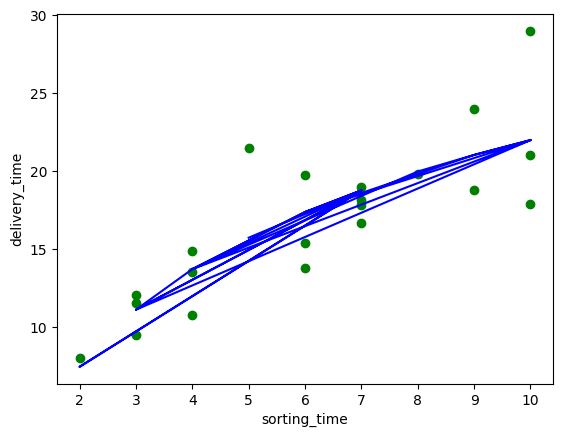

In [18]:
# pred2 = model2.predict(data.iloc[:,0])
pred2
plt.scatter(x=data['sorting_time'],y=data['delivery_time'],color='green');plt.plot(data['sorting_time'],pred2,color='blue');plt.xlabel('sorting_time');plt.ylabel('delivery_time')

                     0         1
Intercept     1.826774  2.415969
sorting_time  0.061378  0.149725


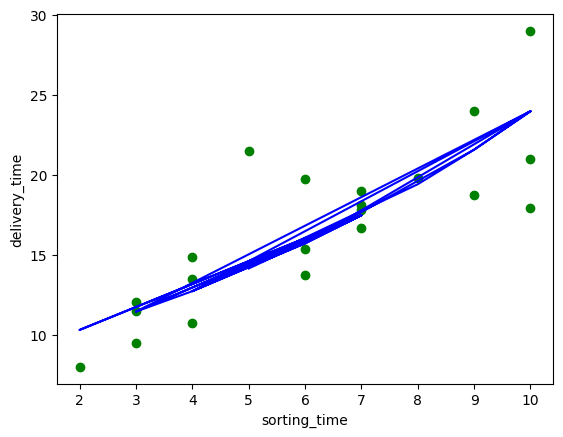

In [19]:
# Exponential transformation
model3 = smf.ols('np.log(delivery_time)~sorting_time',data=data).fit()
model3.params
model3.summary()
print(model3.conf_int(0.01)) # 99% confidence level
pred_log = model3.predict(pd.DataFrame(data['sorting_time']))
pred_log
pred3=np.exp(pred_log)  # as we have used log(delivery_time) in preparing model so we need to convert it back
pred3
pred3.corr(data.delivery_time)
plt.scatter(x=data['sorting_time'],y=data['delivery_time'],color='green');plt.plot(data.sorting_time,np.exp(pred_log),color='blue');plt.xlabel('sorting_time');plt.ylabel('delivery_time')
resid_3 = pred3-data.delivery_time

Text(0, 0.5, 'Standardized Residual')

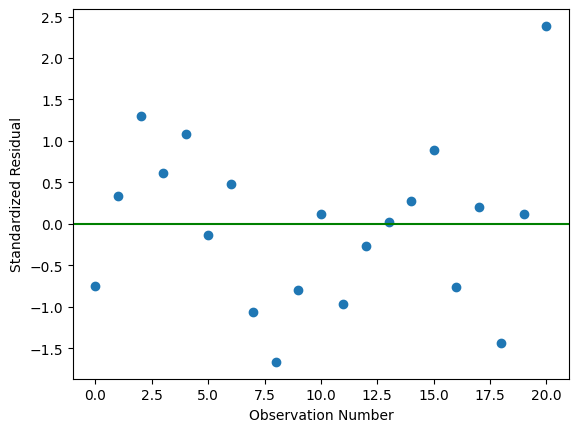

In [20]:
# so we will consider the model having highest R-Squared value which is the log transformation - model3
# getting residuals of the entire data set
student_resid = model3.resid_pearson 
student_resid
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

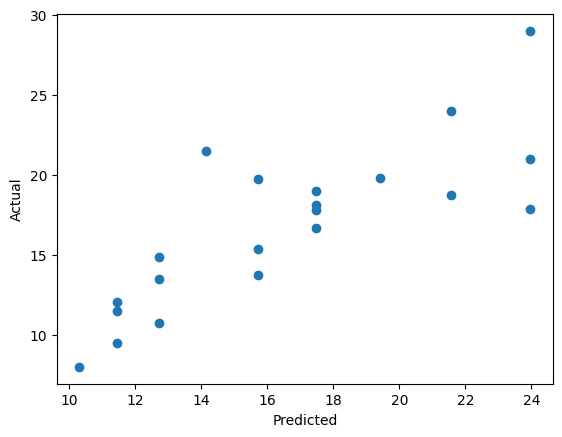

In [21]:
# Predicted vs actual values
plt.scatter(x=pred3,y=data.delivery_time);plt.xlabel("Predicted");plt.ylabel("Actual")

In [22]:
# Quadratic model
sorting_time_Sq = data.sorting_time*data.sorting_time
model_quad = smf.ols("delivery_time~sorting_time+sorting_time_Sq",data=data).fit()
model_quad.params
model_quad.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           2.39e-05
Time:                        05:19:52   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5222      4.160      0.847      0.408      -5.217      12.261
sorting_time        2.8130      1.461      1.926      0.070      -0.256       5.882
sorting_time_Sq    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
pred_quad = model_quad.predict(data.sorting_time)

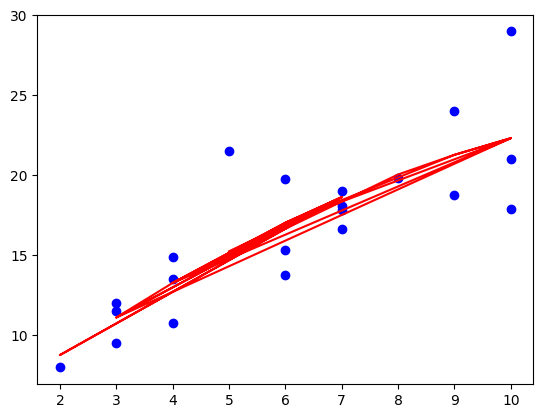

In [24]:
model_quad.conf_int(0.05) 
plt.scatter(data.sorting_time,data.delivery_time,c="b");plt.plot(data.sorting_time,pred_quad,"r")

Text(0, 0.5, 'Standardized Residual')

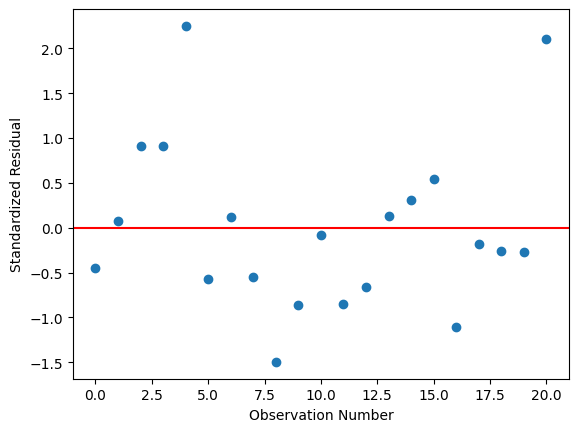

In [25]:
plt.scatter(np.arange(21),model_quad.resid_pearson);plt.axhline(y=0,color='red');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

(array([1., 3., 4., 4., 4., 1., 2., 0., 0., 2.]),
 array([-1.49650277, -1.12173808, -0.74697339, -0.37220871,  0.00255598,
         0.37732067,  0.75208535,  1.12685004,  1.50161472,  1.87637941,
         2.2511441 ]),
 <BarContainer object of 10 artists>)

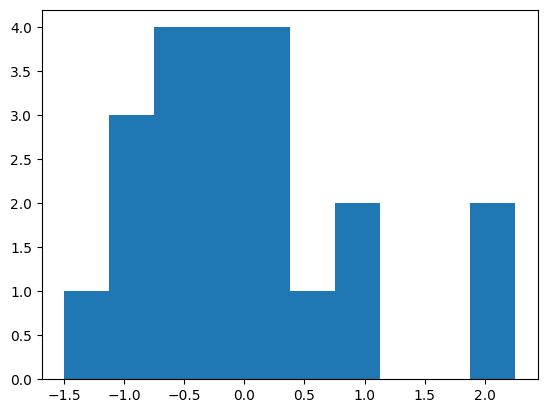

In [26]:
plt.hist(model_quad.resid_pearson) # histogram for residual values 

In [27]:
############################### Implementing the Linear Regression model from sklearn library

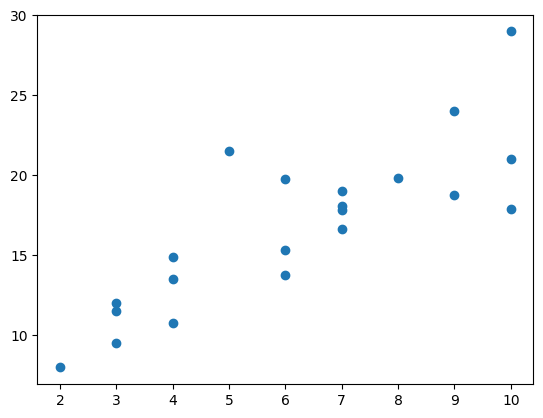

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np
plt.scatter(data.sorting_time,data.delivery_time)
model1 = LinearRegression()
model1.fit(data.sorting_time.values.reshape(-1,1),data.delivery_time)
pred1 = model1.predict(data.sorting_time.values.reshape(-1,1))

In [29]:
# Adjusted R-Squared value
model1.score(data.sorting_time.values.reshape(-1,1),data.delivery_time) #0.9569
rmse1 = np.sqrt(np.mean((pred1-data.delivery_time)**2)) 
model1.coef_
model1.intercept_

6.58273397199706

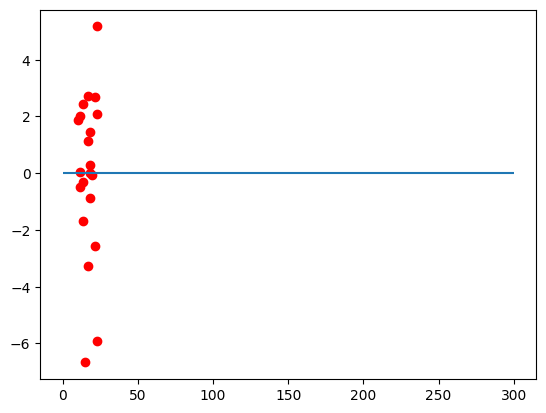

In [30]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter(pred1,(pred1-data.delivery_time),c="r")
plt.hlines(y=0,xmin=0,xmax=300)

(array([2., 0., 1., 1., 2., 6., 2., 6., 0., 1.]),
 array([-6.67216654, -5.4876566 , -4.30314665, -3.1186367 , -1.93412675,
        -0.7496168 ,  0.43489315,  1.6194031 ,  2.80391304,  3.98842299,
         5.17293294]),
 <BarContainer object of 10 artists>)

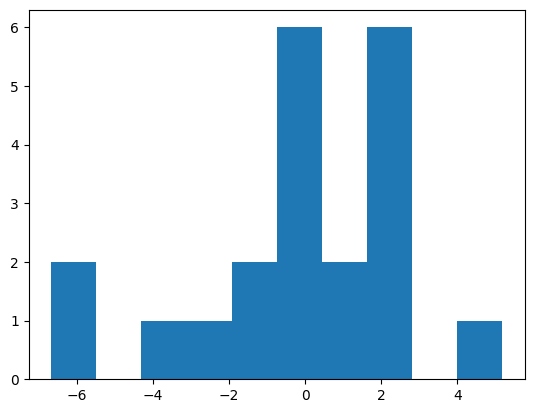

In [31]:
# checking normal distribution for residual
plt.hist(pred1-data.delivery_time)

In [32]:
### Fitting Quadratic Regression 
data["sorting_time_sqrd"] = data.sorting_time*data.sorting_time
model2 = LinearRegression()
model2.fit(X = data.iloc[:,[0,2]],y=data.delivery_time)
pred2 = model2.predict(data.iloc[:,[0,2]])

In [33]:
# Adjusted R-Squared value
model2.score(data.iloc[:,[0,2]],data.delivery_time)
rmse2 = np.sqrt(np.mean((pred2-data.delivery_time)**2)) 
model2.coef_
model2.intercept_

3.552713678800501e-15

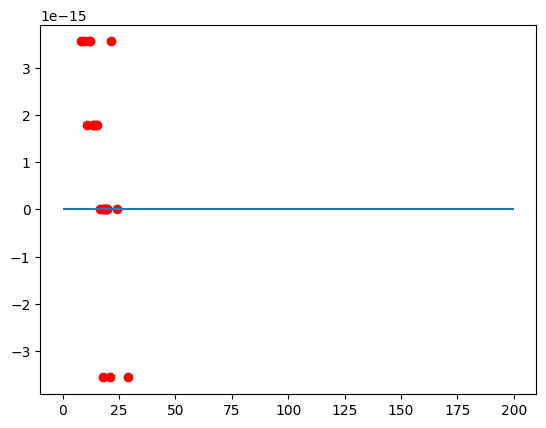

In [34]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter(pred2,(pred2-data.delivery_time),c="r")
plt.hlines(y=0,xmin=0,xmax=200)  

(array([3., 0., 0., 0., 0., 8., 0., 5., 0., 5.]),
 array([-3.55271368e-15, -2.84217094e-15, -2.13162821e-15, -1.42108547e-15,
        -7.10542736e-16,  0.00000000e+00,  7.10542736e-16,  1.42108547e-15,
         2.13162821e-15,  2.84217094e-15,  3.55271368e-15]),
 <BarContainer object of 10 artists>)

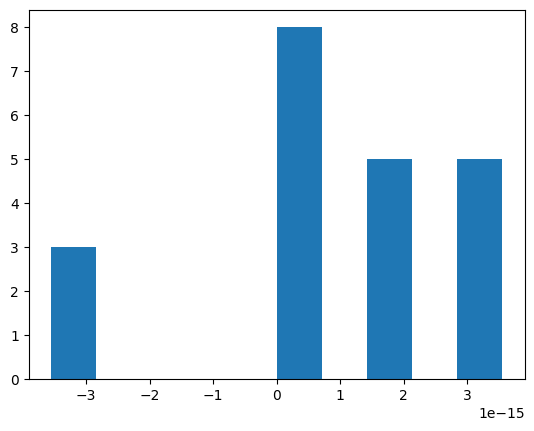

In [35]:
# Checking normal distribution
plt.hist(pred2-data.delivery_time)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-3.55271368e-15, -3.55271368e-15, -3.55271368e-15,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.77635684e-15,
          1.77635684e-15,  1.77635684e-15,  1.77635684e-15,  1.77635684e-15,
          3.55271368e-15,  3.55271368e-15,  3.55271368e-15,  3.55271368e-15,
          3.55271368e-15])),
 (2.2485626814777667e-15, 7.612957883143929e-16, 0.9350961996352296))

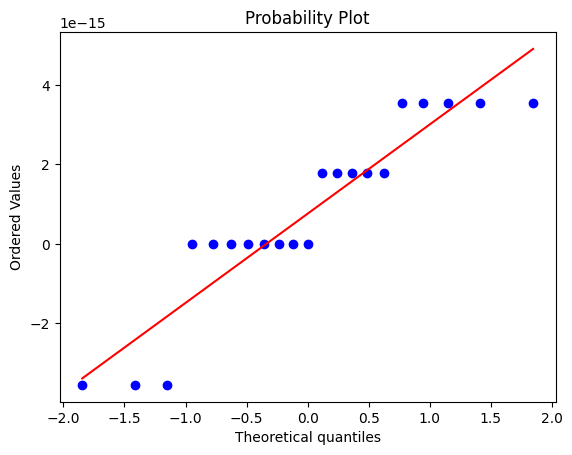

In [36]:
import pylab
import scipy.stats as st
st.probplot(pred2-data.delivery_time,dist="norm",plot=pylab)

In [37]:
# Let us prepare a model by applying transformation on dependent variable
data["delivery_time_sqrt"] = np.sqrt(data.delivery_time)

In [38]:
model3 = LinearRegression()
model3.fit(X = data.iloc[:,[0,2]],y=data.delivery_time_sqrt)
pred3 = model3.predict(data.iloc[:,[0,2]])

In [39]:
# Adjusted R-Squared value
model3.score(data.iloc[:,[0,2]],data.delivery_time_sqrt)
rmse3 = np.sqrt(np.mean(((pred3)**2-data.delivery_time)**2))
model3.coef_
model3.intercept_

2.001343551533572

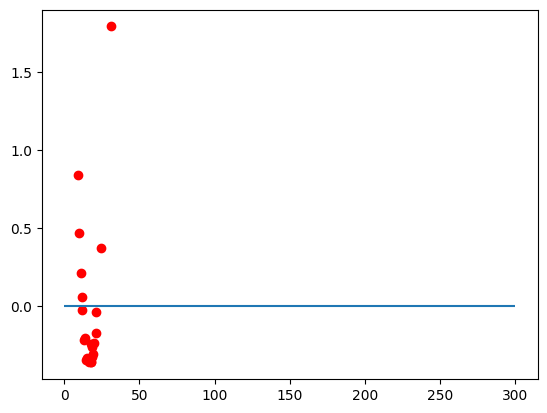

In [40]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter((pred3)**2,((pred3)**2-data.delivery_time),c="r")
plt.hlines(y=0,xmin=0,xmax=300)  

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-0.3638561 , -0.36131594, -0.35857329, -0.34748879, -0.33713627,
         -0.3264343 , -0.31236585, -0.26316369, -0.2465552 , -0.23937662,
         -0.2167589 , -0.20465423, -0.17149293, -0.04240134, -0.02893134,
          0.05940643,  0.21114591,  0.37390485,  0.46733326,  0.8425778 ,
          1.79322496])),
 (0.454383556307033, -0.003471979696133266, 0.8262406381340206))

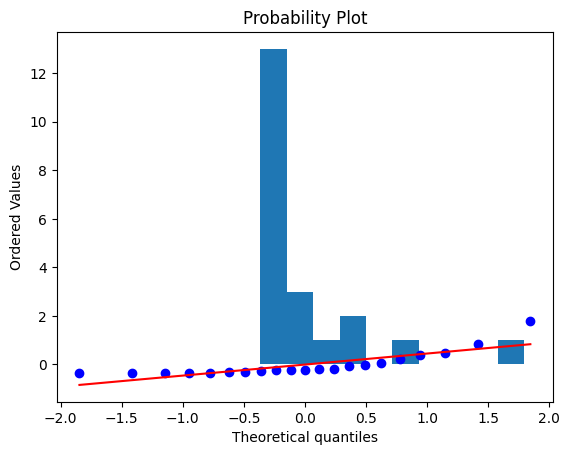

In [41]:
# checking normal distribution for residuals 
plt.hist((pred3)**2-data.delivery_time)
st.probplot((pred3)**2-data.delivery_time,dist="norm",plot=pylab)

In [42]:
# Let us prepare a model by applying transformation on dependent variable without transformation on input variables 
model4 = LinearRegression()
model4.fit(X = data.sorting_time.values.reshape(-1,1),y=data.delivery_time_sqrt)
pred4 = model4.predict(data.sorting_time.values.reshape(-1,1))

In [43]:
# Adjusted R-Squared value
model4.score(data.sorting_time.values.reshape(-1,1),data.delivery_time_sqrt)
rmse4 = np.sqrt(np.mean(((pred4)**2-data.delivery_time)**2)) 
model4.coef_
model4.intercept_

2.7727310393450333

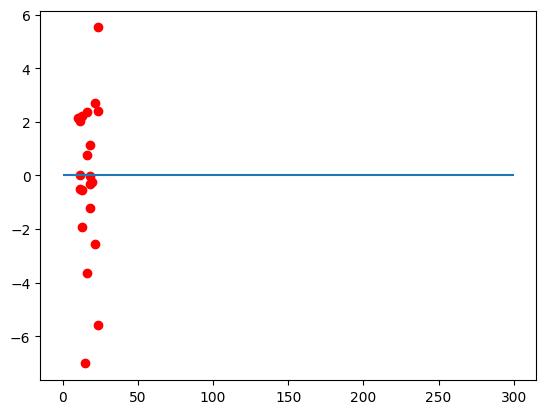

In [44]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter((pred4)**2,((pred4)**2-data.delivery_time),c="r")
plt.hlines(y=0,xmin=0,xmax=300)  

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-7.01520032, -5.58360265, -3.64966762, -2.54070902, -1.92533961,
         -1.1987415 , -0.54533961, -0.52008548, -0.3087415 , -0.24242197,
         -0.0287415 ,  0.00991452,  0.75033238,  1.1212585 ,  2.00991452,
          2.15056207,  2.20466039,  2.35033238,  2.41639735,  2.70929098,
          5.51639735])),
 (2.9771918800907615, -0.11045382417325272, 0.970361366637152))

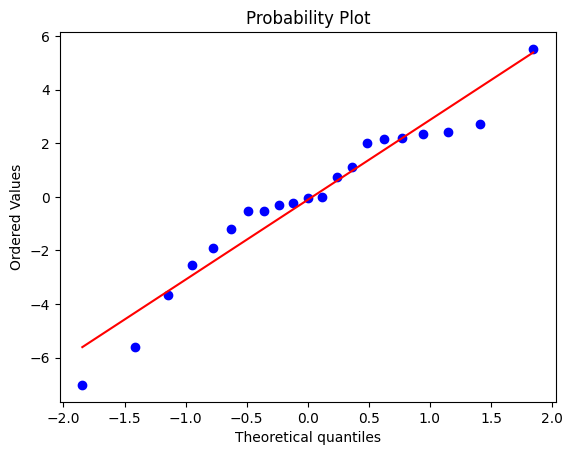

In [45]:
st.probplot((pred4)**2-data.delivery_time,dist="norm",plot=pylab)

(array([1., 1., 1., 1., 2., 6., 2., 6., 0., 1.]),
 array([-7.01520032, -5.76204055, -4.50888079, -3.25572102, -2.00256125,
        -0.74940148,  0.50375828,  1.75691805,  3.01007782,  4.26323758,
         5.51639735]),
 <BarContainer object of 10 artists>)

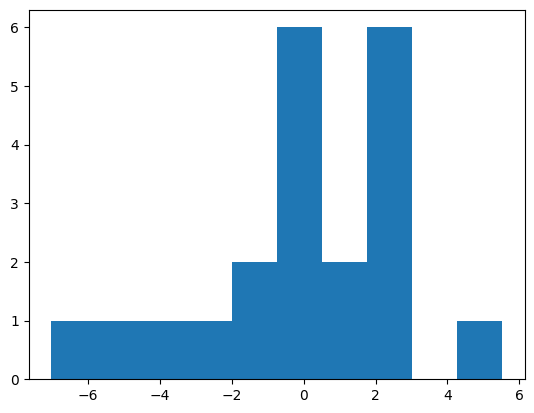

In [46]:
# Checking normal distribution for residuals 
plt.hist((pred4)**2-data.delivery_time)